In [2]:
import cdflib
import pandas as pd
import numpy as np
from datetime import datetime
import os
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cartopy.crs as ccrs
from lib.solar_emphemeris import *
import warnings 
warnings.filterwarnings('ignore')
from chaosmagpy.data_utils import timestamp, mjd2000
from hp30client import getKpindex
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

dst_path = "disturbance_indices\Dst_MJD_1998.dat"

<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
C:\Users\klara\AppData\Local\Temp\ipykernel_18352\15679950.py:17: SyntaxWarning: invalid escape sequence '\D'
  dst_path = "disturbance_indices\Dst_MJD_1998.dat"
C:\Users\klara\AppData\Local\Temp\ipykernel_18352\15679950.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Quiet time selection

In [3]:
start_time = '2000-01-01'
end_time = '2000-12-31'

start_time_mjd = to_mjd2000(2000, 1, 1)
end_time_mjd = to_mjd2000(2000, 12, 31)

# Get Dst indices
time_Dst, Dst = np.loadtxt(dst_path, usecols=(0,1), comments='#',unpack=True)
Dst_start = np.where(np.floor(time_Dst) == start_time_mjd)[0][0]
Dst_end = np.where(np.floor(time_Dst) == end_time_mjd)[0][-1]
Dst_indices = pd.DataFrame({'time_Dst': time_Dst[Dst_start:Dst_end], 'Dst': Dst[Dst_start:Dst_end]})
# Calculating the hourly difference between all Dst measurements.
Dst_indices['Dst_Hourly_Difference'] = Dst_indices.Dst.diff();

# Get Hp30 indices
time_Hp30, Hp30, _ = getKpindex(start_time, end_time, 'Hp30')
Hp30_indices = pd.DataFrame({'time_Hp30': time_Hp30, 'Hp30': Hp30})

# Get Kp indices
time_Kp, Kp, _ = getKpindex(start_time, end_time, 'Kp')
Kp_indices = pd.DataFrame({'time_Kp': time_Kp, 'Kp': Kp})


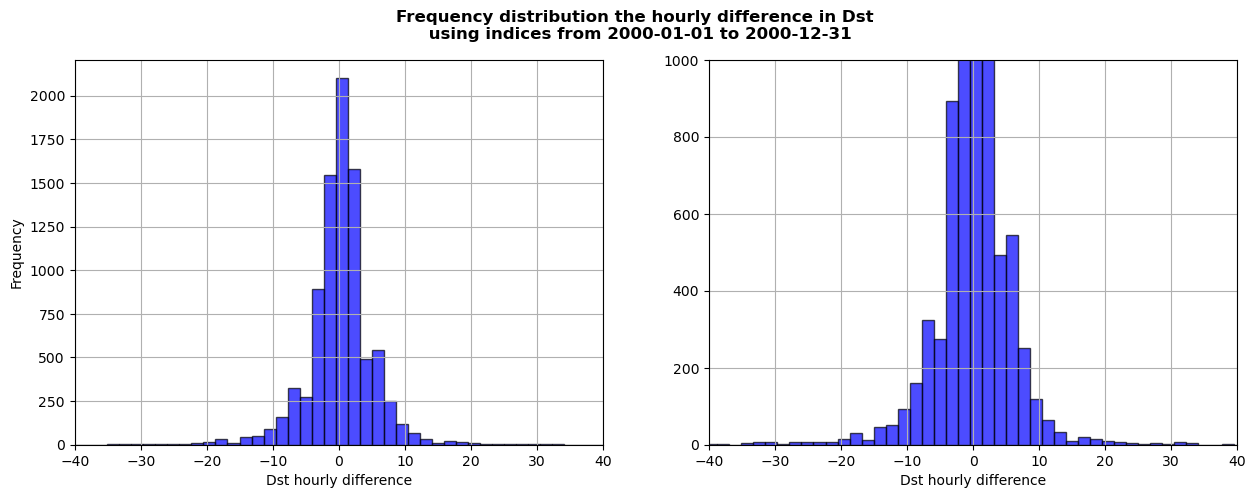

In [8]:
#dDst frequency
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Show whole dist
ax[0].hist(Dst_indices['Dst_Hourly_Difference'], bins=100, color='blue', edgecolor = 'black', alpha=0.7)
ax[0].set_xlabel('Dst hourly difference')
ax[0].set_ylabel('Frequency')
ax[0].grid()
# ax[0].set_title('Frequency Distribution of Dst Hourly Difference')
ax[0].set_xlim(-40, 40)

# Cut frequency
ax[1].hist(Dst_indices['Dst_Hourly_Difference'], bins=100, color='blue', edgecolor = 'black', alpha=0.7)
ax[1].set_xlabel('Dst hourly difference')
ax[1].grid()
ax[1].set_xlim(-40, 40)
ax[1].set_ylim(0, 1000)

fig.suptitle('Frequency distribution the hourly difference in Dst \n using indices from ' + start_time + ' to ' + end_time,  weight='bold')
plt.show()

11.0
9.0


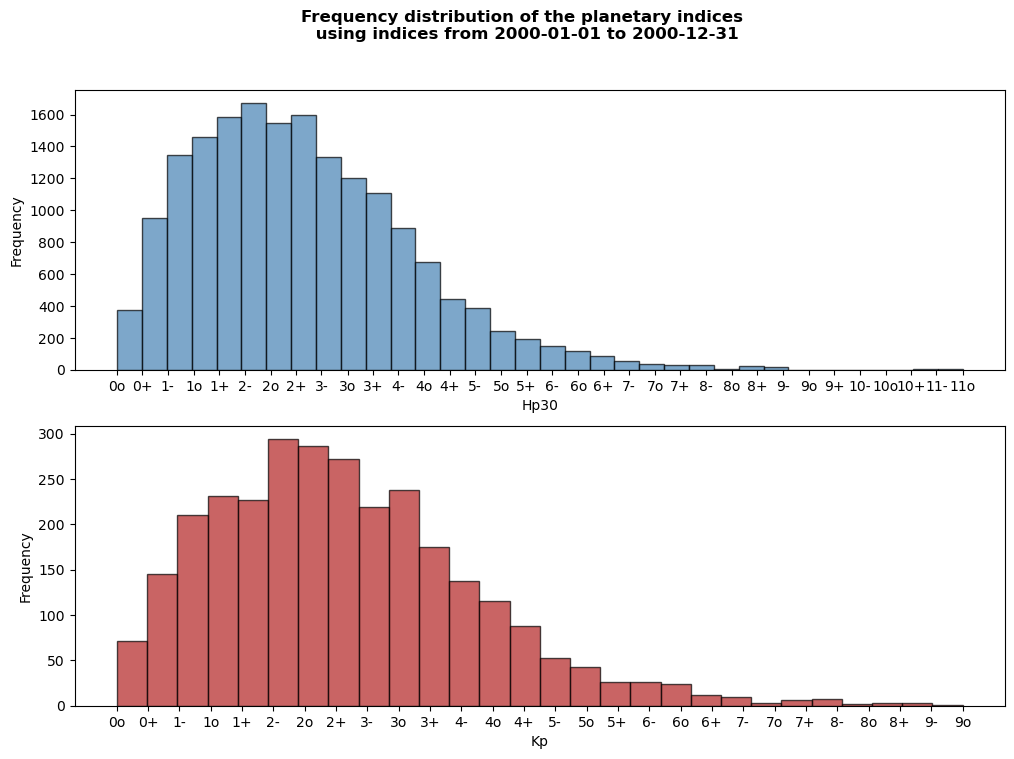

In [7]:
print(max(Hp30_indices['Hp30']))
print(max(Kp_indices['Kp']))

# Hp30 frequency
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Hp30
ax[0].hist(Hp30_indices['Hp30'], color='steelblue', edgecolor='black', alpha=0.7, bins = 34)
ax[0].set_xlabel('Hp30')
ax[0].set_ylabel('Frequency')
# Fix tick labels (0o, 0+, 1-, 1o, 1+, 2-, 2o, 2+, 3-, 3o, 3+, 4-, 4o, 4+, 5-, 5o, 5+, 6-, 6o, 6+, 7-, 7o, 7+, 8-, 8o, 8+, 9-, 9o, 9+, 10-, 10o, 10+, 11-, 11o)
ax[0].set_xticks([0, 0.33, 0.66, 1, 1.33, 1.66, 2, 2.33, 2.66, 3, 3.33, 3.66, 4, 4.33, 4.66, 5, 5.33, 5.66, 6, 6.33, 6.66, 7, 7.33, 7.66, 8, 8.33, 8.66, 9, 9.33, 9.66, 10, 10.33, 10.66, 11])
ax[0].set_xticklabels(['0o', '0+', '1-', '1o', '1+', '2-', '2o', '2+', '3-', '3o', '3+', '4-', '4o', '4+', '5-', '5o', 
                       '5+', '6-', '6o', '6+', '7-', '7o', '7+', '8-', '8o', '8+', '9-', '9o', '9+', '10-', '10o', '10+', '11-', '11o'])

# Kp
ax[1].hist(Kp_indices['Kp'], color='firebrick', edgecolor='black', alpha=0.7, bins = 28)
ax[1].set_xlabel('Kp')
ax[1].set_ylabel('Frequency')
ax[1].set_xticks([0, 0.33, 0.66, 1, 1.33, 1.66, 2, 2.33, 2.66, 3, 3.33, 3.66, 4, 4.33, 4.66, 5, 5.33, 5.66, 6, 6.33, 6.66, 7, 7.33, 7.66, 8, 8.33, 8.66, 9])
ax[1].set_xticklabels(['0o', '0+', '1-', '1o', '1+', '2-', '2o', '2+', '3-', '3o', '3+', '4-', '4o', '4+', '5-', '5o', 
                       '5+', '6-', '6o', '6+', '7-', '7o', '7+', '8-', '8o', '8+', '9-', '9o'])

# Set title for the entire figure
fig.suptitle('Frequency distribution of the planetary indices \n using indices from ' + start_time + ' to ' + end_time,  weight='bold')

plt.show()